# Noisy Data

In this notebook we will explore the impact of noise in the data to the graph construction.

In [1]:
from config import CONFIG
from model.metro_model import MetroModel
from data.metro_dataset import MetroDataset

import torch
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import MLFlowLogger
import os
import numpy as np
import matplotlib.pyplot as plt
import mlflow

torch.manual_seed(0)

c:\Users\simon\Projets\CountryTrends\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\simon\Projets\CountryTrends\.conda\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
c:\Users\simon\Projets\CountryTrends\.conda\lib\site-packages\momepy\coins.py:15: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
imp

In [2]:
multiplicative_noise = 0.1
additive_noise = 0.1

for multiplicative_noise in np.arange(0, 1, 0.1):

    dataset = MetroDataset(CONFIG.lines, init_nb=20, multiplicative_noise = multiplicative_noise, additive_noise = additive_noise)
    num_nodes = dataset.cg.num_nodes()
    dataset.cg.altair_graph(dataset.cg.graph, 10)

    model = MetroModel(embedding_size=8, num_nodes=num_nodes, neighbor_nb=1, input_size=1, gsl_mode="matrix")

    mlf_logger = MLFlowLogger(experiment_name="Noise Impact")
    mlf_logger.log_hyperparams({"multiplicative_noise": multiplicative_noise, "additive_noise": additive_noise})
    train_loader = torch.utils.data.DataLoader(dataset, batch_size=8)
    trainer = Trainer(max_epochs=30, logger=mlf_logger)
    trainer.fit(model, train_loader)

c:\Users\simon\Projets\CountryTrends\.conda\lib\site-packages\momepy\utils.py:430: UserWarning: Approach is not set. Defaulting to 'primal'.
  warnings.warn("Approach is not set. Defaulting to 'primal'.")
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\simon\Projets\CountryTrends\.conda\lib\site-packages\pytorch_lightning\trainer\setup.py:176: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 |

Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 180.38it/s, loss=1.24e+04, v_num=752b]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 179.46it/s, loss=1.24e+04, v_num=752b]


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 | softmax                | Softmax   | 0     
-----------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 177.98it/s, loss=1.42e+05, v_num=1007]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 177.22it/s, loss=1.42e+05, v_num=1007]


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 | softmax                | Softmax   | 0     
-----------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 181.65it/s, loss=2.89e+05, v_num=31f5]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 180.86it/s, loss=2.89e+05, v_num=31f5]


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 | softmax                | Softmax   | 0     
-----------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 185.97it/s, loss=3.37e+04, v_num=3130]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 185.13it/s, loss=3.37e+04, v_num=3130]


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 | softmax                | Softmax   | 0     
-----------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 187.91it/s, loss=3.75e+03, v_num=6ccc]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 186.64it/s, loss=3.75e+03, v_num=6ccc]


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 | softmax                | Softmax   | 0     
-----------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 188.89it/s, loss=2.95e+05, v_num=4630]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 188.03it/s, loss=2.95e+05, v_num=4630]


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 | softmax                | Softmax   | 0     
-----------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 191.22it/s, loss=7.59e+03, v_num=5482]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 190.34it/s, loss=7.59e+03, v_num=5482]


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 | softmax                | Softmax   | 0     
-----------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 187.23it/s, loss=8.25e+04, v_num=4bee]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 186.52it/s, loss=8.25e+04, v_num=4bee]


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 | softmax                | Softmax   | 0     
-----------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 165.72it/s, loss=2.48e+04, v_num=f900]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 164.94it/s, loss=2.48e+04, v_num=f900]


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 | softmax                | Softmax   | 0     
-----------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 176.76it/s, loss=5.08e+07, v_num=e0dd]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 176.01it/s, loss=5.08e+07, v_num=e0dd]


In [58]:
multiplicative_noise = 0.1
additive_noise = 0.1

for additive_noise in np.arange(0, 0.1, 0.01):

    dataset = MetroDataset(CONFIG.lines, init_nb=20, multiplicative_noise = multiplicative_noise, additive_noise = additive_noise)
    num_nodes = dataset.cg.num_nodes()
    dataset.cg.altair_graph(dataset.cg.graph, 10)

    model = MetroModel(embedding_size=8, num_nodes=num_nodes, neighbor_nb=1, input_size=1, gsl_mode="matrix")

    mlf_logger = MLFlowLogger(experiment_name="Noise Impact")
    mlf_logger.log_hyperparams({"multiplicative_noise": multiplicative_noise, "additive_noise": additive_noise})
    train_loader = torch.utils.data.DataLoader(dataset, batch_size=8)
    trainer = Trainer(max_epochs=30, logger=mlf_logger)
    trainer.fit(model, train_loader)

c:\Users\simon\Projets\CountryTrends\.conda\lib\site-packages\momepy\utils.py:430: UserWarning: Approach is not set. Defaulting to 'primal'.
  warnings.warn("Approach is not set. Defaulting to 'primal'.")
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\simon\Projets\CountryTrends\.conda\lib\site-packages\pytorch_lightning\trainer\setup.py:176: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 |

Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 190.34it/s, loss=9.13e+03, v_num=9493]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 189.47it/s, loss=9.13e+03, v_num=9493]


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 | softmax                | Softmax   | 0     
-----------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 182.01it/s, loss=1.07e+04, v_num=3424]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 181.21it/s, loss=1.07e+04, v_num=3424]


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 | softmax                | Softmax   | 0     
-----------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 189.94it/s, loss=1.12e+04, v_num=7d7d]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 189.07it/s, loss=1.12e+04, v_num=7d7d]


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 | softmax                | Softmax   | 0     
-----------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 180.43it/s, loss=1.52e+04, v_num=a8dc]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 179.78it/s, loss=1.52e+04, v_num=a8dc]


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 | softmax                | Softmax   | 0     
-----------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 187.84it/s, loss=1.72e+04, v_num=d383]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 186.99it/s, loss=1.72e+04, v_num=d383]


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 | softmax                | Softmax   | 0     
-----------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 177.65it/s, loss=1.94e+04, v_num=6a2e]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 176.89it/s, loss=1.94e+04, v_num=6a2e]


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 | softmax                | Softmax   | 0     
-----------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 188.22it/s, loss=1.56e+04, v_num=4fc3]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 187.36it/s, loss=1.56e+04, v_num=4fc3]


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 | softmax                | Softmax   | 0     
-----------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 179.65it/s, loss=3.17e+04, v_num=2d8b]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 179.00it/s, loss=3.17e+04, v_num=2d8b]


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 | softmax                | Softmax   | 0     
-----------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 187.65it/s, loss=2.25e+04, v_num=d392]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 186.80it/s, loss=2.25e+04, v_num=d392]


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type      | Params
-----------------------------------------------------
0 | node_embeddings_start  | Embedding | 296   
1 | node_embeddings_target | Embedding | 296   
2 | _linear1               | Linear    | 72    
3 | _linear2               | Linear    | 72    
4 | graph_layer            | GraphConv | 3     
5 | linear                 | Linear    | 1.4 K 
6 | softmax                | Softmax   | 0     
-----------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 184.97it/s, loss=4.83e+04, v_num=bf34]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 184.15it/s, loss=4.83e+04, v_num=bf34]


In [52]:
client = mlflow.tracking.MlflowClient()

def get_run(run_id):
    run = mlflow.get_run(run_id)
    additive_noise = run.data.params['additive_noise']
    multiplicative_noise = run.data.params['multiplicative_noise']
    metrics = client.get_metric_history(run_id, "loss")
    return {
        "additive_noise": additive_noise,
        "multiplicative_noise": multiplicative_noise,
        "metrics": metrics,
    }

## Impact of multiplicative noise

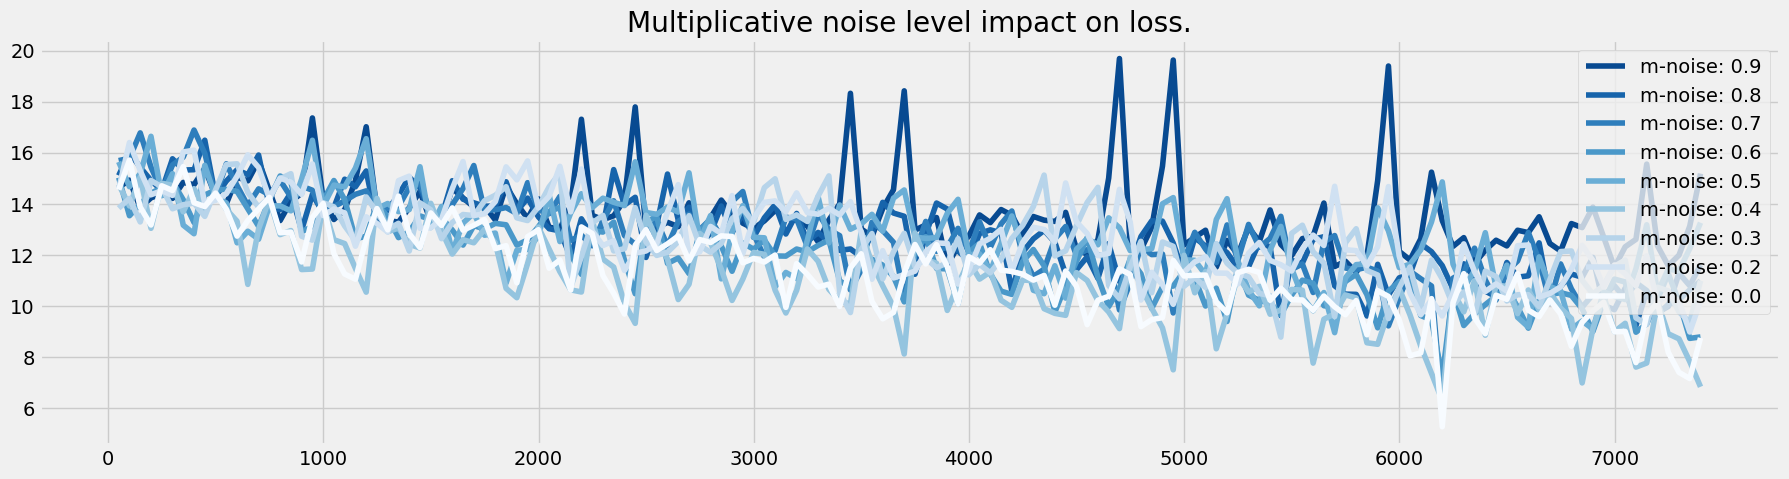

In [53]:
cmap = plt.get_cmap('Blues')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,5))
for run_id in [
    "b670223ddc0d4cc4a26445c795c9e0dd", 
    "a97a1d9af7c74aada19694de1d6ef900",
    "bee54799e9844568a82f5b49b45b4bee",
    "e16b8b80a04849cb9646392fe42b5482",
    "86d16bc7882a446289113f3ead184630",
    "62878443c87a4622adb895c1d70f6ccc",
    "89f6bf1e3c8b4f339d7588b17a253130",
    "7e4e60990e16483b81fed5e145e631f5",
    "b3937da1cc7c48ccbd3eb1146022752b"
    ]:
    run = get_run(run_id)
    plt.plot(
        [m.step for m in run['metrics']], 
        np.log([m.value for m in run['metrics']]), 
        label=f"m-noise: {float(run['multiplicative_noise']) * 100 // 1 / 100}",
        color=cmap(float(run['multiplicative_noise']))
        )

plt.legend()
plt.title('Multiplicative noise level impact on loss.')
plt.show()

## Additive noise

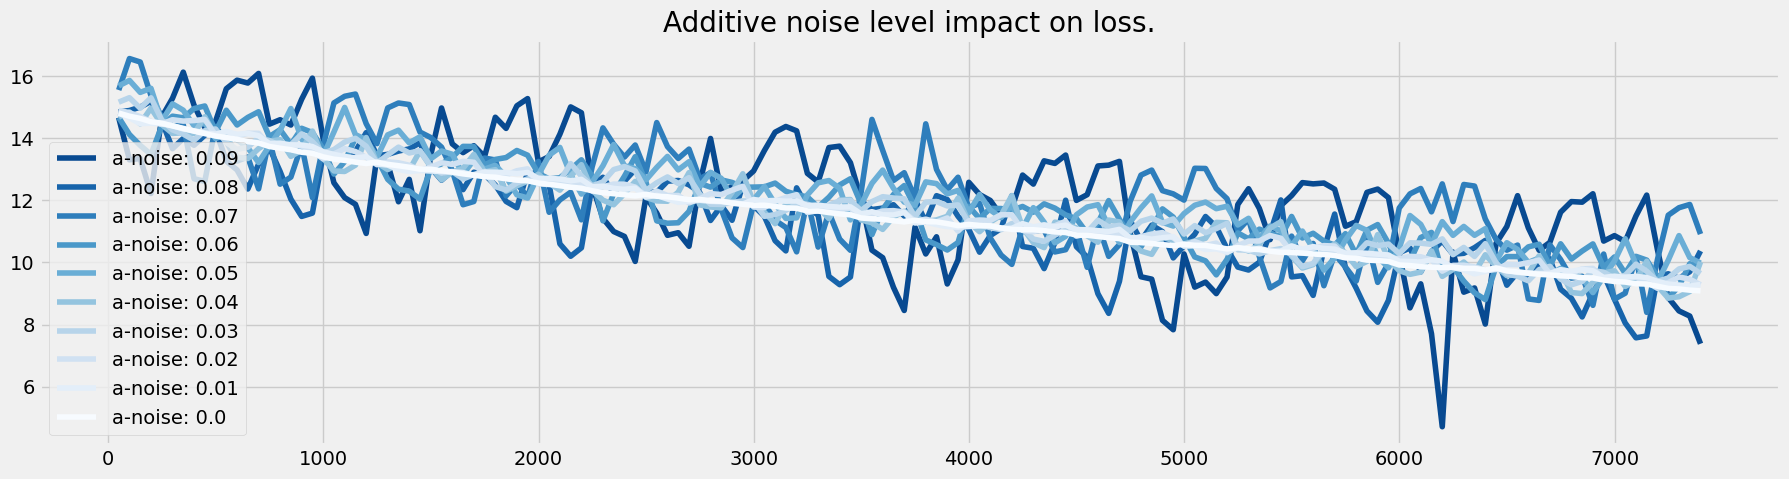

In [60]:
cmap = plt.get_cmap('Blues')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,5))
for run_id in [
    "fe2ddb867f284f87aee55b890e14bf34", 
    "26408ab748c14018a2c0a329c925d392",
    "849c00dc82ec4e74aacc4564ca682d8b",
    "7b9e764d5dd5417aa021415c9bd04fc3",
    "5e2991e1beb247eaaf5d43ec09f66a2e",
    "b8a6f890e11e4e1b931795c6042cd383",
    "e5c4268fd68a4f75a46608c2db30a8dc",
    "1c215110d569406abd2e5b7909207d7d",
    "a84039e339e2498090d6a1bbc40e3424",
    "e82b94098ea74f9c8a8463a4ebda9493"
    ]:
    run = get_run(run_id)
    plt.plot(
        [m.step for m in run['metrics']], 
        np.log([m.value for m in run['metrics']]), 
        label=f"a-noise: {float(run['additive_noise']) * 100 // 1 / 100}",
        color=cmap(10*float(run['additive_noise']))
        )

plt.legend()
plt.title('Additive noise level impact on loss.')
plt.show()

In [69]:
import networkx as nx

A = model.graph_matrix_learning().detach().numpy()
A = np.array(A) > 0.131

learned_graph = nx.from_numpy_array(A, nx.DiGraph)
dataset.cg.altair_graph(learned_graph, 10)

alt.LayerChart(...)